In [1]:
from demo_3 import (get_filesystem_access, 
                    create_config_example, 
                    read_config, 
                    get_config_values, 
                    get_n,
                    get_x,
                    get_y, 
                    generate_report, 
                    write_csv_nxy)
from pathlib import Path

output_dir /home/dberns/Data/Notebooks/ex-1
csv_filename /home/dberns/Data/Notebooks/ex-1/demo.csv


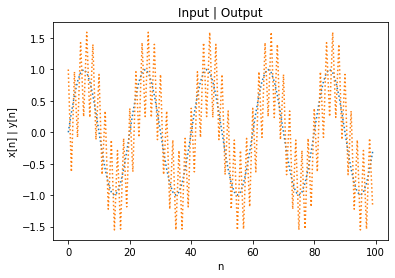

In [2]:
# Where can we read and write data?
path = get_filesystem_access()  

# Where is the config file?
config_filename = path + 'config.json'

# Hack: I don't want to create the config file manually.
# So, I include this line of code
create_config_example(config_filename)
# /Hack

# Read config file and store in config; type(config) == dict
config = read_config(config_filename)

assert(type(config) == dict)

# Convert config to variables
a0, a1, a2, b1, output_dirname = get_config_values(config)
max_n = 1000
n = get_n(max_n)
x = get_x(n)
y0 = 1.0

# Here we do some calculations 
y = get_y(n, x, a0, a1, a2, b1, y0, max_n)

# ## Report and data files

output_dir = Path(path, output_dirname)
output_dir.mkdir(mode=0o700, parents=True, exist_ok=True) # Explain this
print('output_dir', output_dir)

# Filenames are created inside the function
generate_report(output_dir, n, x, y)


# Filenames created outside the function
csv_filename = Path(output_dir, 'demo.csv')

print('csv_filename', csv_filename)

write_csv_nxy(csv_filename, n, x, y)

In [3]:
import pandas as pd

In [4]:
# Using pandas for read csv file
dataframe = pd.read_csv(csv_filename)
dataframe

,n,x,y
0,0,0.000000,1.000000
1,1,0.309017,-0.629180
2,2,0.587785,0.963702
3,3,0.809017,-0.080189
4,4,0.951057,1.426207
...,...,...,...
995,995,-1.000000,-1.553667
996,996,-0.951057,-0.289714
997,997,-0.809017,-1.539839
998,998,-0.587785,-0.096796
